<a href="https://colab.research.google.com/github/ivancleycarneiro/Python/blob/main/Projeto_An%C3%A1lise_de_Estudantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Análise Estudantes

Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas.
Vamos tentar entendera influência dos antecedentes dos pais, preparação para testes, no desempenho dos alunos.

Os dados desse trabalho foram baixados do site Kaggle.com

[fonte dos dados da pesquisa](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download)



Este trabalho foi realizado como exercício do curso "Python para Análise de Dados".

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Vamos ler os dados para iniciarmos as análises
Base_Dados = pd.read_csv('/content/StudentsPerformance+(1).csv')

# vamos conhecer a dimensão da nossa tabela de dados usando a função .shape
Base_Dados.shape

(1000, 8)

In [3]:
# Para conhecermos os primeiros ítens da tabala, utilizamos o .head()

Base_Dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


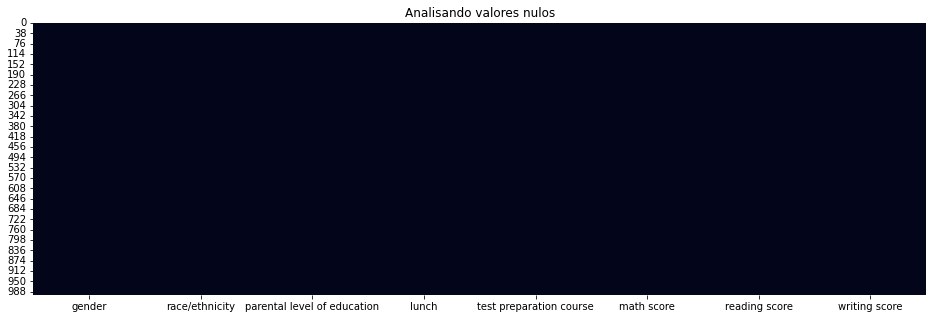

In [4]:
# Para não termos problemas durante as análises, vamos ver se temos campos nulos na tabela. 

plt.figure(figsize=(16,5))
Nulos = Base_Dados.isnull()
plt.title('Analisando valores nulos')
sns.heatmap(Nulos, cbar= False);

In [5]:
# Como podemos ver no gráfico acima, não temos campos nulos. Uma outra forma de vermos a mesma informação é através do comando .sum() que nos mostra uma lista das colunas.

Nulos.sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# Vamos agora analisar se os valores únicos

Base_Dados.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [7]:
# E será que tem informação duplicada?  Vamos utilizar as funções .duplicated() e .sum() para descobrirmos.
Base_Dados.duplicated().sum()

0

In [8]:
# Vamos ver uma análise estatística 
Base_Dados.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
# Para sabermos os tipos dos dados da tabela, utilizaremos a função .info()
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
# Se quisermos saber quantas alunos são feminino e masculino, usamos o .value_counts

Base_Dados['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [11]:
# e se pedirmos a porcentagem adicionamos o .normalize dentro do value_counts e multiplicamos por 100.

Base_Dados['gender'].value_counts(normalize=True)*100

female    51.8
male      48.2
Name: gender, dtype: float64

In [12]:
# Agora podemos alterar o coluna para analisar as outras colunas da tabela.

Base_Dados['race/ethnicity'].value_counts(normalize=True)*100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

In [13]:
# Para apresentar o nível educacional dos pais do alunos, basta mudarmos para a coluna "parental level of education".
Base_Dados['parental level of education'].value_counts(normalize=True)*100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

In [14]:
# Aqui vamos o percentual em relação a almoço na escola.
Base_Dados['lunch'].value_counts(normalize=True)*100

standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64

In [15]:
# E desses alunos, quantos fizeram o teste preparatório? Vamos saber?
Base_Dados['test preparation course'].value_counts(normalize=True)*100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

In [16]:
# Separamos a análise estatística dos meninos e meninas para depois analisarmos com os gráficos.
Base_Dados.groupby(by=['gender']).describe()['math score'].reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
1,male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


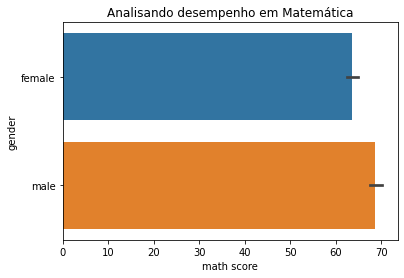

In [17]:
# Vamos colocar os dados em forma gráfica para melhor visualização. 
sns.barplot(data=Base_Dados, x='math score', y='gender')
plt.title('Analisando desempenho em Matemática');

# Podemos ver nesse gráfico de barras que os meninos tiveram uma média em matemática um pouco melhor que das meninas.

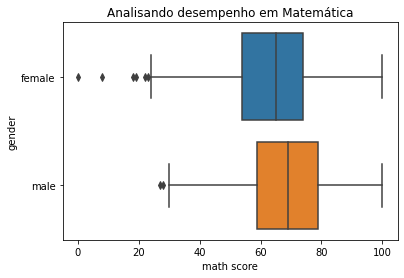

In [18]:
# Mesma informação, porém em forma de boxplot para vermos as distribuições dos quartis.
plt.title('Analisando desempenho em Matemática');
sns.boxplot(data=Base_Dados, x='math score', y='gender');

#Podemos ver que as meninas tiveram alguns outlayers para baixo o que diminuiu um pouco a média.

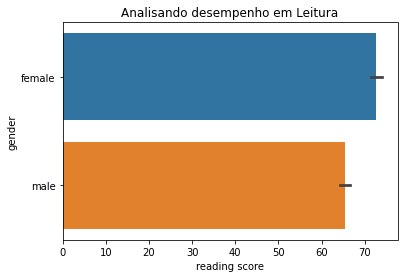

In [19]:
# Agora vamos ver em leitura, como ficam os gráficos.
plt.title('Analisando desempenho em Leitura');
sns.barplot(data=Base_Dados, x='reading score', y='gender');

#Aqui já mudou um pouco, as meninas se saíram melhor.

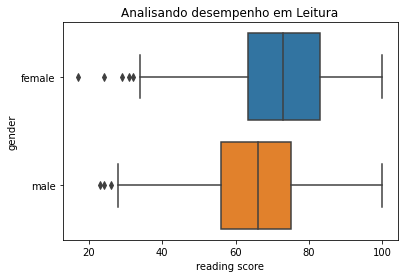

In [20]:
sns.boxplot(data=Base_Dados, x='reading score', y='gender');
plt.title('Analisando desempenho em Leitura');


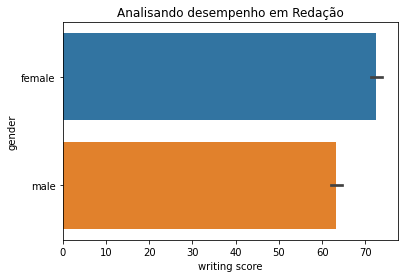

In [21]:
# E em redação como foi o desempenho? Veremos agora.
plt.title('Analisando desempenho em Redação');


sns.barplot(data=Base_Dados, x='writing score', y='gender');

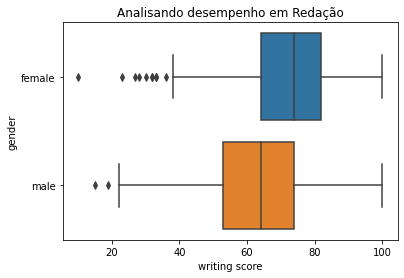

In [22]:
sns.boxplot(data=Base_Dados, x='writing score', y='gender');
plt.title('Analisando desempenho em Redação');


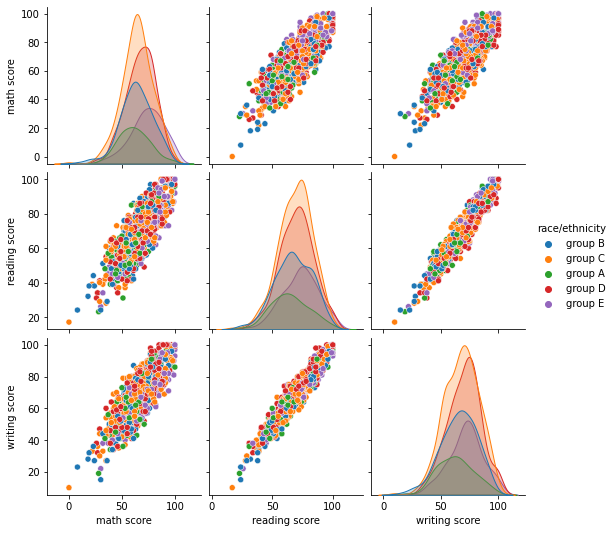

In [23]:
# Agora vamos fazer uma análise grafica comparando o desempenho por raça/ étnico.

sns.pairplot( Base_Dados, hue='race/ethnicity');

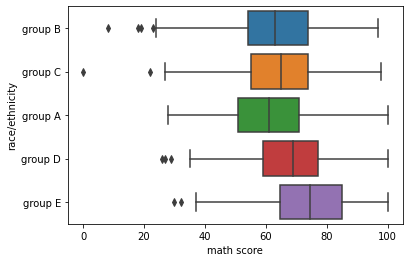

In [24]:
# A mesma análise do grupo por boxplot.

sns.boxplot(data=Base_Dados, x='math score', y= 'race/ethnicity');

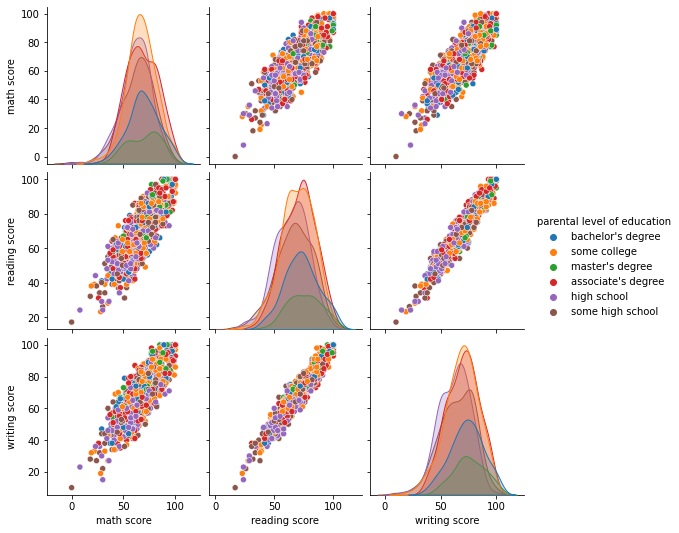

In [25]:
# Analisando o desempenho dos alunos pelo nívevl de instruão dos pais.
sns.pairplot( Base_Dados, hue='parental level of education');

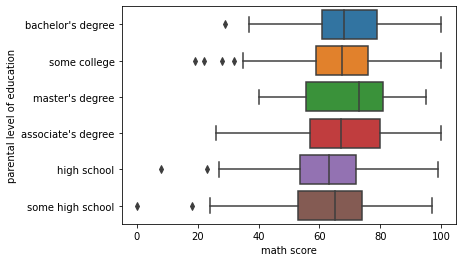

In [26]:

sns.boxplot(data=Base_Dados, x='math score', y='parental level of education');

In [27]:
# Para uma análise mais detalhada dos dados podemos usar por agruapamento
Base_Dados.groupby(by=['parental level of education']).describe()['math score'].reset_index()


,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


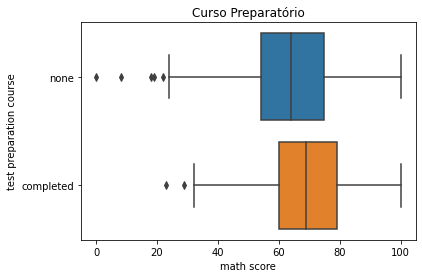

In [28]:
#Análise dos alunos se fizeram ou não cursos preparatório.
plt.title('Curso Preparatório');
sns.boxplot(data=Base_Dados, x='math score', y='test preparation course');

In [29]:
Base_Dados.groupby(by=['test preparation course']).describe()['math score'].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
1,none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


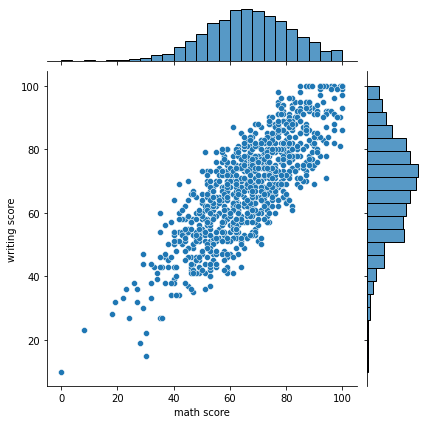

In [30]:
grafico = sns.JointGrid(data=Base_Dados, x='math score', y='writing score')
grafico.plot(sns.scatterplot,sns.histplot);